In [1]:
import xarray
#from dask_jobqueue import SLURMCluster
#from dask.distributed import Client
import os
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal as scipy_signal
from scipy import linalg as scipy_linalg
from scipy.integrate import trapz
from scipy.fft import fftfreq,fftshift
import pandas
import cartopy.crs as ccrs


In [3]:
argo_clim = xarray.open_dataset('/tube1/cha674/RG_Climatology/RG_temperature_salinity_clim_updated_2020.nc')

In [19]:

argo_time_corrected = pandas.date_range(start=argo_clim['TIME'][0].values, periods=argo_clim['TIME'].size, freq='M')
argo_clim['TIME'] = argo_time_corrected.values

In [20]:
argo_clim['TIME']

<xarray.DataArray 'TIME' (TIME: 192)>
array(['2004-01-31T00:00:00.000000000', '2004-02-29T00:00:00.000000000',
       '2004-03-31T00:00:00.000000000', '2004-04-30T00:00:00.000000000',
       '2004-05-31T00:00:00.000000000', '2004-06-30T00:00:00.000000000',
       '2004-07-31T00:00:00.000000000', '2004-08-31T00:00:00.000000000',
       '2004-09-30T00:00:00.000000000', '2004-10-31T00:00:00.000000000',
       '2004-11-30T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-01-31T00:00:00.000000000', '2005-02-28T00:00:00.000000000',
       '2005-03-31T00:00:00.000000000', '2005-04-30T00:00:00.000000000',
       '2005-05-31T00:00:00.000000000', '2005-06-30T00:00:00.000000000',
       '2005-07-31T00:00:00.000000000', '2005-08-31T00:00:00.000000000',
       '2005-09-30T00:00:00.000000000', '2005-10-31T00:00:00.000000000',
       '2005-11-30T00:00:00.000000000', '2005-12-31T00:00:00.000000000',
       '2006-01-31T00:00:00.000000000', '2006-02-28T00:00:00.000000000',
       '2006-03-31T00:00:00.000000000', '2006-04-30T00:00:00.000000000',
       '2006-05-31T00:00:00.000000000', '2006-06-30T00:00:00.000000000',
       '2006-07-31T00:00:00.000000000', '2006-08-31T00:00:00.000000000',
       '2006-09-30T00:00:00.000000000', '2006-10-31T00:00:00.000000000',
       '2006-11-30T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-01-31T00:00:00.000000000', '2007-02-28T00:00:00.000000000',
       '2007-03-31T00:00:00.000000000', '2007-04-30T00:00:00.000000000',
       '2007-05-31T00:00:00.000000000', '2007-06-30T00:00:00.000000000',
       '2007-07-31T00:00:00.000000000', '2007-08-31T00:00:00.000000000',
       '2007-09-30T00:00:00.000000000', '2007-10-31T00:00:00.000000000',
       '2007-11-30T00:00:00.000000000', '2007-12-31T00:00:00.000000000',
       '2008-01-31T00:00:00.000000000', '2008-02-29T00:00:00.000000000',
       '2008-03-31T00:00:00.000000000', '2008-04-30T00:00:00.000000000',
       '2008-05-31T00:00:00.000000000', '2008-06-30T00:00:00.000000000',
       '2008-07-31T00:00:00.000000000', '2008-08-31T00:00:00.000000000',
       '2008-09-30T00:00:00.000000000', '2008-10-31T00:00:00.000000000',
       '2008-11-30T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-01-31T00:00:00.000000000', '2009-02-28T00:00:00.000000000',
       '2009-03-31T00:00:00.000000000', '2009-04-30T00:00:00.000000000',
       '2009-05-31T00:00:00.000000000', '2009-06-30T00:00:00.000000000',
       '2009-07-31T00:00:00.000000000', '2009-08-31T00:00:00.000000000',
       '2009-09-30T00:00:00.000000000', '2009-10-31T00:00:00.000000000',
       '2009-11-30T00:00:00.000000000', '2009-12-31T00:00:00.000000000',
       '2010-01-31T00:00:00.000000000', '2010-02-28T00:00:00.000000000',
       '2010-03-31T00:00:00.000000000', '2010-04-30T00:00:00.000000000',
       '2010-05-31T00:00:00.000000000', '2010-06-30T00:00:00.000000000',
       '2010-07-31T00:00:00.000000000', '2010-08-31T00:00:00.000000000',
       '2010-09-30T00:00:00.000000000', '2010-10-31T00:00:00.000000000',
       '2010-11-30T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-01-31T00:00:00.000000000', '2011-02-28T00:00:00.000000000',
       '2011-03-31T00:00:00.000000000', '2011-04-30T00:00:00.000000000',
       '2011-05-31T00:00:00.000000000', '2011-06-30T00:00:00.000000000',
       '2011-07-31T00:00:00.000000000', '2011-08-31T00:00:00.000000000',
       '2011-09-30T00:00:00.000000000', '2011-10-31T00:00:00.000000000',
       '2011-11-30T00:00:00.000000000', '2011-12-31T00:00:00.000000000',
       '2012-01-31T00:00:00.000000000', '2012-02-29T00:00:00.000000000',
       '2012-03-31T00:00:00.000000000', '2012-04-30T00:00:00.000000000',
       '2012-05-31T00:00:00.000000000', '2012-06-30T00:00:00.000000000',
       '2012-07-31T00:00:00.000000000', '2012-08-31T00:00:00.000000000',
       '2012-09-30T00:00:00.000000000', '2012-10-31T00:00:00.000000000',
       '2012-11-30T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-01-31T0

In [4]:
argo_climp['T']

argo_climatology_file_path = '/tube1/cha674/RG_Climatology'
argo_climatology_file_name = 'RG_ArgoClim_Temperature_Salinity_2019.nc'


argo_climatology_dataset = xarray.open_dataset(os.path.join(argo_climatology_file_path,argo_climatology_file_name),decode_times=False)
units, reference_date = argo_climatology_dataset['TIME'].attrs['units'].split('since')

    
    
start_date = pandas.Timestamp(reference_date)+ pandas.DateOffset(months=argo_climatology_dataset['TIME'][0].values.astype('int'))
argo_climatology_dataset['TIME'] = pandas.date_range(start=start_date , periods=argo_climatology_dataset.sizes['TIME'], freq='MS') + pandas.Timedelta(14,'D')

In [3]:
start_date

Timestamp('2004-01-01 00:00:00')

In [4]:
argo_temperature = (argo_climatology_dataset['ARGO_TEMPERATURE_MEAN'] + argo_climatology_dataset['ARGO_TEMPERATURE_ANOMALY']).transpose('TIME','PRESSURE','LATITUDE','LONGITUDE')
argo_salinity = (argo_climatology_dataset['ARGO_SALINITY_MEAN'] + argo_climatology_dataset['ARGO_SALINITY_ANOMALY']).transpose('TIME','PRESSURE','LATITUDE','LONGITUDE')

In [5]:
argo_anomaly_file_path = '/tube1/cha674/RG_Climatology'
argo_anomaly_file_name = 'RG_ArgoClim_2019.anom.merge.nc'
argo_anomaly_dataset    = xarray.open_dataset(os.path.join(argo_anomaly_file_path,argo_anomaly_file_name),decode_times=False)



units, reference_date = argo_anomaly_dataset['TIME'].attrs['units'].split('since')

start_date = pandas.Timestamp(reference_date)+ pandas.DateOffset(months=argo_anomaly_dataset['TIME'][0].values.astype('int'))
argo_anomaly_dataset['TIME'] = pandas.date_range(start=start_date , periods=argo_anomaly_dataset.sizes['TIME'], freq='MS')  + pandas.Timedelta(14,'D')


In [6]:
argo_temperature = xarray.concat([argo_temperature, (argo_climatology_dataset['ARGO_TEMPERATURE_MEAN'] + argo_anomaly_dataset['ARGO_TEMPERATURE_ANOMALY']).transpose('TIME','PRESSURE','LATITUDE','LONGITUDE') ],dim='TIME')
argo_salinity = xarray.concat([argo_salinity, (argo_climatology_dataset['ARGO_SALINITY_MEAN'] + argo_anomaly_dataset['ARGO_SALINITY_ANOMALY']).transpose('TIME','PRESSURE','LATITUDE','LONGITUDE') ],dim='TIME')

In [130]:
argo_temperature_monthly_clim = argo_temperature.groupby('TIME.month').mean(dim='TIME').compute()
argo_temperature_monthly_anomalies = argo_temperature.groupby('TIME.month') - argo_temperature_monthly_clim
argo_temperature_monthly_anomalies.compute()


argo_salinity_monthly_clim = argo_salinity.groupby('TIME.month').mean(dim='TIME').compute()
argo_salinity_monthly_anomalies = argo_salinity.groupby('TIME.month') - argo_salinity_monthly_clim
argo_salinity_monthly_anomalies.compute()

<xarray.DataArray (TIME: 192, PRESSURE: 58, LATITUDE: 145, LONGITUDE: 360)>
array([[[[-7.99942017e-03, -6.31332397e-03, -6.87789917e-03, ...,
          -4.02488708e-02, -2.73132324e-02, -1.46865845e-02],
         [-2.11906433e-02, -1.85623169e-02, -1.84974670e-02, ...,
          -3.87458801e-02, -3.28750610e-02, -2.51846313e-02],
         [-3.09982300e-02, -3.02543640e-02, -2.96249390e-02, ...,
          -3.07502747e-02, -3.13720703e-02, -3.10020447e-02],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[-1.40647888e-02, -1.22489929e-02, -1.26876831e-02, ...,
          -4.86259460e-02, -3.48091125e-02, -2.16865540e-02],
         [-2.58140564e-02, -2.43186951e-02, -2.34336853e-02, ...,
          -4.61235046e-02, -3.82537842e-02, -3.13110352e-02],
         [-3.59382629e-02, -3.50036621e-02, -3.37486267e-02, ...,
          -3.59382629e-02, -3.62510681e-02, -3.60679626e-02],
...
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[ 8.73565674e-04,  8.16345215e-04,  8.77380371e-04, ...,
           6.86645508e-04,  1.18637085e-03,  7.47680664e-04],
         [ 8.73565674e-04,  8.16345215e-04,  8.77380371e-04, ...,
           6.86645508e-04,  1.49917603e-03,  8.08715820e-04],
         [ 9.38415527e-04,  6.25610352e-04,  6.86645508e-04, ...,
           6.25610352e-04,  1.37329102e-03,  6.25610352e-04],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]]]],
      dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) datetime64[ns] 2004-01-15 2004-02-15 ... 2019-12-15
    month      (TIME) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [134]:
argo_climate_updated_dataset = argo_temperature.to_dataset(name='TEMPERATURE')
argo_climate_updated_dataset['TEMPERATURE_MONTHLY_CLIM'] = argo_temperature_monthly_clim
argo_climate_updated_dataset['TEMPERATURE_MONTHLY_ANOMALIES'] = argo_temperature_monthly_anomalies

argo_climate_updated_dataset['SALINITY'] = argo_salinity
argo_climate_updated_dataset['SALINITY_MONTHLY_CLIM'] = argo_salinity_monthly_clim
argo_climate_updated_dataset['SALINITY_MONTHLY_ANOMALIES'] = argo_salinity_monthly_anomalies


In [29]:
argo_climate_updated_dataset.coords

Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) datetime64[ns] 2004-01-15 2004-02-15 ... 2019-12-15
  * month      (month) datetime64[ns] 2019-01-15 2019-02-15 ... 2019-12-15

In [137]:
argo_climate_updated_dataset.to_netcdf(os.path.join(argo_climatology_file_path,'RG_temperature_salinity_clim_updated_2020.nc'))

In [5]:
argo_climate_updated_dataset = xarray.open_dataset(os.path.join(argo_climatology_file_path,'RG_temperature_salinity_clim_updated_2020.nc'))

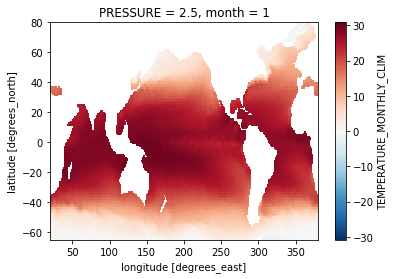

In [6]:
argo_climate_updated_dataset['TEMPERATURE_MONTHLY_CLIM'][0,0,:,:].plot()

In [55]:
argo_climate_updated_dataset_Indian = argo_climate_updated_dataset.sel(LONGITUDE=slice(30,120),LATITUDE=slice(-20,20)).squeeze()

In [7]:
argo_month = pandas.date_range(start=pandas.Timestamp('2000-01-01')- pandas.DateOffset(months=1) , periods=14, freq='MS') + pandas.Timedelta(14,'D')



new_clim = xarray.DataArray(np.concatenate([argo_climate_updated_dataset['TEMPERATURE_MONTHLY_CLIM'][-1,:,:,:].values[np.newaxis,:,:,:],argo_climate_updated_dataset['TEMPERATURE_MONTHLY_CLIM'].values,
                                             argo_climate_updated_dataset['TEMPERATURE_MONTHLY_CLIM'][0,:,:,:].values[np.newaxis,:,:,:]],axis=0),
                            dims=('TIME','PRESSURE','LATITUDE','LONGITUDE'),
                            coords={'TIME':argo_month,'PRESSURE':argo_climate_updated_dataset['PRESSURE'].values,
                                    'LONGITUDE':argo_climate_updated_dataset['LONGITUDE'].values,
                                    'LATITUDE':argo_climate_updated_dataset['LATITUDE'].values})

argo_temperature_dayofyear_clim = new_clim.resample(TIME="1D").interpolate("linear") .groupby('TIME.dayofyear').mean(dim='TIME')

new_clim = xarray.DataArray(np.concatenate([argo_climate_updated_dataset['SALINITY_MONTHLY_CLIM'][-1,:,:,:].values[np.newaxis,:,:,:],argo_climate_updated_dataset['SALINITY_MONTHLY_CLIM'].values,
                                             argo_climate_updated_dataset['SALINITY_MONTHLY_CLIM'][0,:,:,:].values[np.newaxis,:,:,:]],axis=0),
                            dims=('TIME','PRESSURE','LATITUDE','LONGITUDE'),
                            coords={'TIME':argo_month,'PRESSURE':argo_climate_updated_dataset['PRESSURE'].values,
                                    'LONGITUDE':argo_climate_updated_dataset['LONGITUDE'].values,
                                    'LATITUDE':argo_climate_updated_dataset['LATITUDE'].values})

argo_salinity_dayofyear_clim = new_clim.resample(TIME="1D").interpolate("linear") .groupby('TIME.dayofyear').mean(dim='TIME')

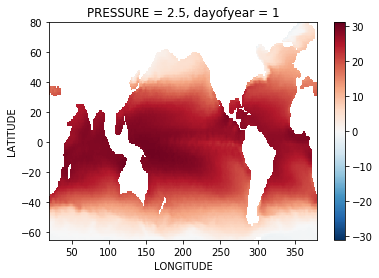

In [9]:
argo_temperature_dayofyear_clim[0,0,:,:].plot()

In [10]:
argo_dayofyear_clim = argo_temperature_dayofyear_clim.to_dataset(name='TEMPERATURE_CLIM')
argo_dayofyear_clim['SALINITY_CLIM'] = argo_salinity_dayofyear_clim

argo_dayofyear_clim.to_netcdf(os.path.join(argo_climatology_file_path,'RG_temperature_salinity_clim_updated_2020.dayofyear.nc'))

In [64]:
argo_dayofyear_clim

<xarray.Dataset>
Dimensions:           (LATITUDE: 145, LONGITUDE: 360, PRESSURE: 58, dayofyear: 366)
Coordinates:
  * PRESSURE          (PRESSURE) float32 2.5 10.0 20.0 ... 1.9e+03 1.975e+03
  * LONGITUDE         (LONGITUDE) float32 20.5 21.5 22.5 ... 377.5 378.5 379.5
  * LATITUDE          (LATITUDE) float32 -64.5 -63.5 -62.5 ... 77.5 78.5 79.5
  * dayofyear         (dayofyear) int64 1 2 3 4 5 6 ... 361 362 363 364 365 366
Data variables:
    TEMPERATURE_CLIM  (dayofyear, PRESSURE, LATITUDE, LONGITUDE) float64 -0.8...
    SALINITY_CLIM     (dayofyear, PRESSURE, LATITUDE, LONGITUDE) float64 33.8...

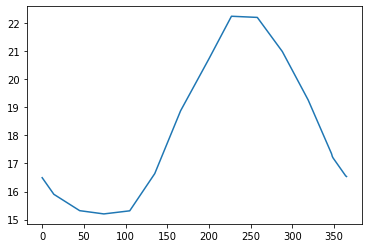

In [53]:
plt.plot(argo_temperature_dayofyear_clim[:,0,100,200])

In [26]:
argo_temperature_dayofyear_clim['month']

<xarray.DataArray 'month' (month: 335)>
array(['2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', ..., '2019-12-13T00:00:00.000000000',
       '2019-12-14T00:00:00.000000000', '2019-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * month    (month) datetime64[ns] 2019-01-15 2019-01-16 ... 2019-12-15

In [12]:
#argo_temperature_dayofyear_clim = argo_climate_updated_dataset['TEMPERATURE_MONTHLY_CLIM'].resample(TIME="1D").interpolate("linear").groupby('TIME.dayofyear').mean(dim='TIME')
argo_temperature_dayofyear_clim_Indian = argo_climate_updated_dataset_Indian['TEMPERATURE'].resample(TIME="1D").interpolate("linear").groupby('TIME.dayofyear').mean(dim='TIME')

KeyboardInterrupt: 